<a href="https://colab.research.google.com/github/Justabhi96/TF2.0/blob/master/7_CNN_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q tensorflow==2.0.0-beta1

     |████████████████████████████████| 87.9MB 48kB/s 
     |████████████████████████████████| 3.1MB 66.2MB/s 
     |████████████████████████████████| 501kB 48.6MB/s 


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import fashion_mnist

In [0]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train/255.0, X_test/255.0
X_train.shape

4423680/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)

In [0]:
# Since CNN expects imput data to be (K*W*H*C) dimension we need to create X_train and X_test to 4D
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
X_train.shape

(60000, 28, 28, 1)

In [0]:
print(set(y_train))
K = len(set(y_train))
print("Number of Classes: ", K)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Number of Classes:  10


In [0]:
i = Input(shape = X_train[0].shape)
x = Conv2D(filters = 32, kernel_size= (3,3), strides = 2, activation = "relu")(i)
x = Conv2D(filters = 64, kernel_size= (3,3), strides = 2, activation = "relu")(x)
x = Conv2D(filters = 128, kernel_size= (3,3), strides = 2, activation = "relu")(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation = "relu")(x)
x = Dropout(0.2)(x)
x = Dense(K, activation = "softmax")(x)

model = Model(i, x)
model.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 15)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 24s 405us/sample - loss: 0.5204 - accuracy: 0.8078 - val_loss: 0.4025 - val_accuracy: 0.8472
Epoch 2/15
60000/60000 [==============================] - 23s 389us/sample - loss: 0.3556 - accuracy: 0.8665 - val_loss: 0.3563 - val_accuracy: 0.8669
Epoch 3/15
60000/60000 [==============================] - 23s 389us/sample - loss: 0.3093 - accuracy: 0.8836 - val_loss: 0.3338 - val_accuracy: 0.8799
Epoch 4/15
60000/60000 [==============================] - 23s 392us/sample - loss: 0.2772 - accuracy: 0.8970 - val_loss: 0.2984 - val_accuracy: 0.8884
Epoch 5/15
60000/60000 [==============================] - 23s 389us/sample - loss: 0.2536 - accuracy: 0.9039 - val_loss: 0.3079 - val_accuracy: 0.8862
Epoch 6/15
60000/60000 [==============================] - 24s 405us/sample - loss: 0.2280 - accuracy:

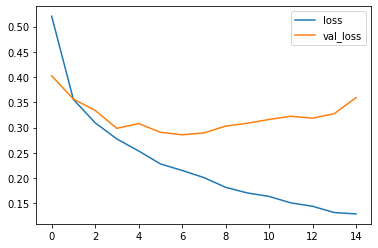

In [0]:
# loss per iteration
plt.plot(r.history["loss"], label = "loss")
plt.plot(r.history["val_loss"], label = "val_loss")
plt.legend()

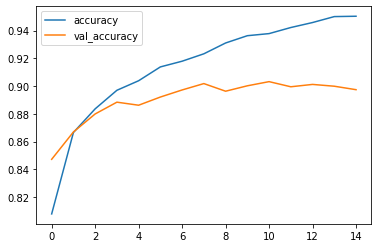

In [0]:
# accuracy per iteration
plt.plot(r.history["accuracy"], label = "accuracy")
plt.plot(r.history["val_accuracy"], label = "val_accuracy")
plt.legend()

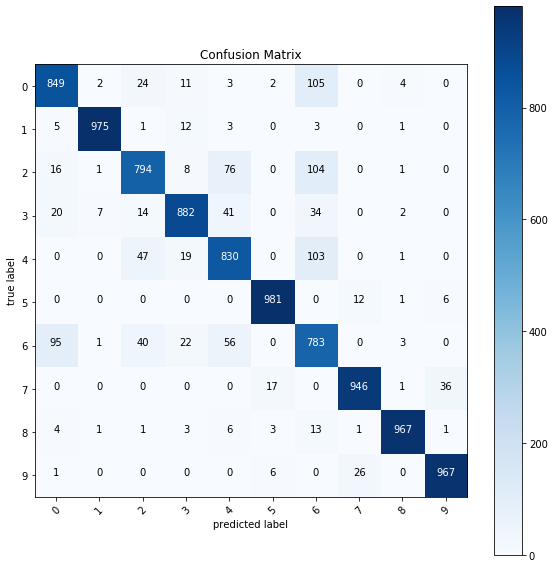

In [0]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes, title = "Confusion Matrix", cmap = plt.cm.Blues):
  plt.figure(figsize=(8, 8))
  plt.imshow(cm, interpolation="nearest", cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  thresh = cm.max()/2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], "d"),
             horizontalalignment = "center", 
             color = "white" if cm[i, j]>thresh else "black")
  plt.tight_layout()
  plt.ylabel("true label")
  plt.xlabel("predicted label")
  plt.show()

ptest = model.predict(X_test).argmax(axis = 1)
cm = confusion_matrix(y_test, ptest)
plot_confusion_matrix(cm, list(range(K)))

In [0]:
labels = """T-shirt/Top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot""".split(",")
reference = [(i, item) for i, item in zip(range(len(labels)), labels)]
reference

[(0, 'T-shirt/Top'),
 (1, 'Trouser'),
 (2, 'Pullover'),
 (3, 'Dress'),
 (4, 'Coat'),
 (5, 'Sandal'),
 (6, 'Shirt'),
 (7, 'Sneaker'),
 (8, 'Bag'),
 (9, 'Ankle boot')]

Text(0.5, 1.0, 'True label: Shirt, Predicted: T-shirt/Top')

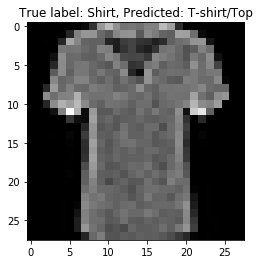

In [0]:
misclassified_idx = np.where(ptest != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i].reshape(28, 28), cmap = "gray")
plt.title(f"True label: {labels[y_test[i]]}, Predicted: {labels[ptest[i]]}")